In [1]:
import os

if not os.environ.get('WEBBPSF_PATH'):
    os.environ['WEBBPSF_PATH'] = '/data/webbpsf-data'

import webbpsf
from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from visualization_helpers import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams


**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-059 CANNOT BE CHECKED AGAINST ONLINE VERSION


# Not Now

In [ ]:
# def get_ra_dec_with_uncertainty_from_header(fits):
#     return fits[0].header['TARG_RA'], fits[0].header['TARG_DEC'], fits[0].header['TARGURA'], fits[0].header['TARGUDEC']

In [ ]:
# ra, dec, u_ra, u_dec = get_ra_dec_with_uncertainty_from_header(psfstacks[filter_key])

In [ ]:
# def prepare_query_keys(ra, dec, u_ra, u_dec):
#     coord = SkyCoord(ra= ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')

#     width = u.Quantity(u_ra, u.deg)

#     height = u.Quantity(u_dec, u.deg)
    
#     return coord, width, height

In [ ]:
# coord, width, height = prepare_query_keys(ra, dec, u_ra, u_dec)

# query_results = Gaia.query_object_async(coordinate=coord, width=width, height=height)

In [ ]:
# query_results

In [ ]:
# def target_star_selection(query_results):
#     idx = np.argmin(query_results['dist'])

#     return query_results[idx]

In [ ]:
# target_star = target_star_selection(query_results)

# distance = (target_star['parallax'] * u.marcsec).to(u.parsec, equivalencies=u.parallax())

# distance, distance.to(u.au)

In [ ]:
# one_pix_side_length_arcsec = np.sqrt(psfstacks[filter_key][1].header['PIXAR_A2']) * u.arcsec

In [ ]:
# one_pix_side_length_arcsec, distance.to(u.au) * np.tan(one_pix_side_length_arcsec)

In [ ]:
# exoplanet_extremes = {
#     # https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars
#     # 7,506 +5,205 -2,060 AU
#     'max_distance_from_star': 7506 * u.au,
#     'min_distance_from_star': 0.970 * u.au,
# }

In [ ]:
# max_pixel_distance = exoplanet_extremes['max_distance_from_star'] / (distance.to(u.au) * np.tan(one_pix_side_length_arcsec))
# min_pixel_distance = exoplanet_extremes['min_distance_from_star'] / (distance.to(u.au) * np.tan(one_pix_side_length_arcsec))

# max_pixel_distance , min_pixel_distance 

# Now

In [ ]:
def create_psf_model(det='NRCA1', filt='F070W', fov_arcsec=5):

    nrc = webbpsf.NIRCam()

    nrc.detector = det 
    nrc.filter = filt

    print("Using a {field}".format(field=fov_arcsec), "arcsec fov")

    psf = nrc.calc_psf(fov_arcsec=fov_arcsec, oversample=2, display=True)
    #psf = nrc.calc_psf(fov_pixels=fov_pixels, oversample=2, display=True)
    webbpsf.display_psf(psf)
    
    # psf = nrc.psf_grid(num_psfs=9, all_detectors=False)
    # webbpsf.gridded_library.display_psf_grid(psf)

    return psf     

In [ ]:
detector = psfstacks[filter_key][0].header['DETECTOR']
fov = np.round(np.sqrt(psfstacks[filter_key][1].header['PIXAR_A2']), 3) * psfstacks[filter_key][1].data.shape[1]
if detector == 'NRCALONG':
    detector = 'NRCA5'
elif detector == 'NRCBLONG':
    detector = 'NRCB5'

filter = psfstacks[filter_key][0].header['FILTER']

In [ ]:
psf = create_psf_model(det=detector, filt=filter, fov_arcsec=fov*2)

In [ ]:
psf[0].header, '-------------------------------------------', psf[1].header

In [ ]:
def find_differences(psfs):
    for idx, key in enumerate(psfs[0].header.keys()):
        try:
            if psfs[0].header[key] != psfs[1].header[key] or psfs[0].header[key] != psfs[2].header[key] or psfs[0].header[key] != psfs[3].header[key]:
                print(key, psfs[0].header[key], psfs[1].header[key], psfs[2].header[key], psfs[3].header[key])
        except:
            print(key, 'not found in psfs')


In [ ]:
find_differences(psf)

In [ ]:
# plt.figure(figsize=(36,36))

# plt.subplot(4,1,1)
# plt.imshow(np.arcsinh(psf[0].data))

# plt.subplot(4,1,2)
# plt.imshow(np.arcsinh(psf[1].data))

# plt.subplot(4,1,3)
# plt.imshow(np.arcsinh(psf[2].data))

# plt.subplot(4,1,4)
# plt.imshow(np.arcsinh(psf[3].data))


# Control

In [2]:
PROPOSAL_ID = '1386'
INSTRUMENT = 'NIRCAM'
directory = f'/data/scratch/bariskurtkaya/dataset/{INSTRUMENT}/{PROPOSAL_ID}/mastDownload/JWST/'

In [3]:
psfstacks_nircam_dirs = get_stage3_products(suffix='psfstack',directory=directory)

In [4]:
def get_filename_from_dir(fits_dir):
    return '_'.join(fits_dir.split('/')[-1].split('_')[:-1])

In [5]:
get_filename_from_dir(psfstacks_nircam_dirs[0])

'jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r'

In [6]:
psfstacks = {}

for idx, dir in enumerate(psfstacks_nircam_dirs):
    fits_name = get_filename_from_dir(dir)
    psfstacks[fits_name] = fits.open(dir)


In [7]:
filter_key = get_filename_from_dir(psfstacks_nircam_dirs[0])
psfstacks[filter_key].info()

Filename: /data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r_psfstack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     358   ()      
  1  SCI           1 ImageHDU        97   (320, 320, 18)   float32   
  2  ERR           1 ImageHDU        11   (320, 320, 18)   float32   
  3  DQ            1 ImageHDU        12   (320, 320, 18)   int32 (rescales to uint32)   
  4  ASDF          1 BinTableHDU     11   1R x 1C   [9203B]   


In [8]:
rcParams['figure.figsize'] = [12,12]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 80

In [ ]:
plt.imshow(np.arcsinh(psfstacks[filter_key][1].data[idx]))

In [10]:
from copy import deepcopy

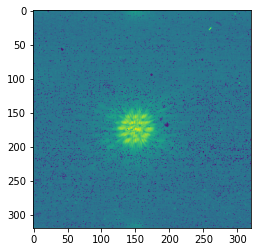

In [12]:
from scipy.interpolate import griddata

#grid = griddata(points, values, (grid_x, grid_y), method='linear')

for idx,_ in enumerate(psfstacks[filter_key][1].data):
    psf1_non = np.nan_to_num(psfstacks[filter_key][1].data[idx])

plt.imshow(np.arcsinh(psf1_non))

In [13]:
psf_ = deepcopy(psfstacks[filter_key][1].data[idx])

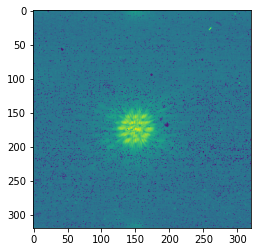

In [14]:
from scipy.interpolate import griddata

#grid = griddata(points, values, (grid_x, grid_y), method='linear')
mean = np.mean(psf1_non)
for idx,_ in enumerate(psfstacks[filter_key][1].data):
    psf1_mean = np.nan_to_num(psf_,nan=mean)

plt.imshow(np.arcsinh(psf1_non))

In [ ]:
# np.round(np.max(psfstacks[filter_key][1].data[0])/10)

# temp_psf = psf[1].data * (np.max(psfstacks[filter_key][1].data[0]) / (2.5 * np.max(psf[1].data)))

In [ ]:
def random_injection(psfstack, generated_psf):
    x = np.random.randint(0, psfstack[1].data.shape[1])
    y = np.random.randint(0, psfstack[1].data.shape[2])

    x = 50
    y = 50
    print(x,y)

    injected = generated_psf[320-x:320-x+psfstack[1].data.shape[1], 320-y:320-y+psfstack[1].data.shape[2]] + psfstack[1].data[0]

    return injected

In [ ]:
injected = random_injection(psfstacks[filter_key], temp_psf)

In [ ]:
plt.imshow(injected)

# Real data

In [ ]:
i2d_dir_1386 = '/data/scratch/bariskurtkaya/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t004_nircam_f356w-maskrnd-sub320a335r_i2d.fits'

fits.open(i2d_dir_1386).info()

In [ ]:
plt.imshow(fits.open(i2d_dir_1386)[1].data)